In [1]:
from myBdd import *

In [2]:
f = boolfunc.Expression(
    r"input\1.pcn")
print(f)

4
3
3 1 2 3
2 -2 4
2 -3 4


In [11]:
ordering = [2,3,4,1]
print(ordering)
a = BDD(f, ordering)
a

[2, 3, 4, 1]


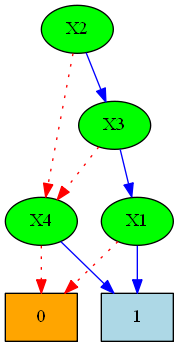

In [12]:
a.displayGraph()

[1, 2, 3, 4]


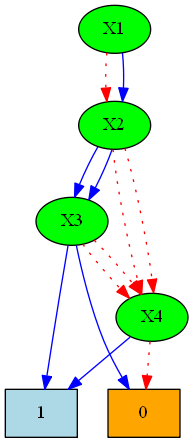

In [14]:
ordering = [1,2,3,4]
print(ordering)
a = BDD(f, ordering)
a.displayGraph()